In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 데이터 불러오기
>- 1번 ) 2019년 주유소들의 일자별 가격 데이터

In [2]:
# 상반기, 하반기 주유소 가격 데이터 조회
first = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv', encoding = 'utf-8')
second = pd.read_csv('data/2019년 하반기 주유소 판매가격.csv', encoding = 'utf-8')

first.shape, second.shape
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90590 entries, 0 to 90589
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      90590 non-null  object
 1   지역      90590 non-null  object
 2   상호      90590 non-null  object
 3   주소      90590 non-null  object
 4   기간      90590 non-null  int64 
 5   상표      90590 non-null  object
 6   셀프여부    90590 non-null  object
 7   고급휘발유   90590 non-null  int64 
 8   휘발유     90590 non-null  int64 
 9   경유      90590 non-null  int64 
 10  실내등유    90590 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 7.6+ MB


In [3]:
# 상반기, 하반기 DataFrame  합치기
'''합치기
방법1)concat
방법2)join
방법3)merge
'''
df = pd.concat([first, second], axis = 0, ignore_index = True )
df.shape

(181714, 11)

In [4]:
# DataFrame 기본 정보 조회
df.shape
df.info()
df.head()
df.tail()
df.describe()
df.describe(include ='object') # 문자열 컬럼의 요약 통계

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.3+ MB


,번호,지역,상호,주소,상표,셀프여부
count,181714,181714,181714,181714,181714,181714
unique,512,25,507,512,8,2
top,A0009177,서울 강남구,신성주유소,서울특별시 서초구 효령로 356 (서초동),SK에너지,일반
freq,365,14597,1095,365,71062,108492


- 인덱스가 A, B 두 0 - 9만얼마, 0-9만얼마 로 연속하게 되지 않았기 때문에 콘켓할때 ignore_index를 하게되면 인덱스가 0번부만 18만 으로 붙게된다. 
- 결측치는 없다. 
- 데이터타입은 잘 맞는지 확인하기 
- 기간컬럼의타입이 int로 되어있는데 int가 편할지 등등 
- describe확인하면 고급휘발유인데 값들이 낮다? 0인 부분들이 있다. 이럴때 출처에서 왜 0인지 확인을 해야한다. 수집을못해서 0으로 한거면 결측치이며 잘못된 정보를 기입한거면 이상치. 
- 

In [5]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()
df['상표'].value_counts()

SK에너지     71062
GS칼텍스     49494
현대오일뱅크    28583
S-OIL     27027
알뜰주유소      4021
자가상표        982
알뜰(ex)      365
NH-OIL      180
Name: 상표, dtype: int64

In [6]:
# 지역 컬럼의 고유값 조회
df['지역'].value_counts()

서울 강남구     14597
서울 서초구     13762
서울 강서구     12572
서울 영등포구    11667
서울 송파구     11630
서울 양천구      9149
서울 성북구      8080
서울 동대문구     7996
서울 구로구      7917
서울 도봉구      6711
서울 광진구      6450
서울 은평구      6199
서울 성동구      6192
서울 관악구      5997
서울 강동구      5897
서울 중랑구      5719
서울 서대문구     5594
서울 노원구      5466
서울 용산구      5439
서울 금천구      4738
서울 강북구      4736
서울 중구       4235
서울 마포구      4051
서울 동작구      3644
서울 종로구      3276
Name: 지역, dtype: int64

In [7]:
df['셀프여부'].value_counts()

일반    108492
셀프     73222
Name: 셀프여부, dtype: int64

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 **일괄처리** 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series)`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

In [8]:
# apply 예시 
def test(s):
    return s.split(' ')[1] # 공백을 기준으로 나눔 
df['지역'].apply(test)

0         강남구
1         강남구
2         강남구
3         강남구
4         강남구
         ... 
181709    중랑구
181710    중랑구
181711    중랑구
181712    중랑구
181713    중랑구
Name: 지역, Length: 181714, dtype: object

In [9]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출)
df['구'] = df['지역'].str.split(' ').str[1]
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,강남구


# =======2교시 =======

- 날짜형태는 날짜에 맞춰서 하는것이 좋다. 
- pd.to_datetime을 사용해서 

In [10]:
# 유닉스 타임이란 
import time 
a = time.time()
a # 1970.01.01 00:00:00 부터 실행시점 까지 초 단위로 계산값이 나온다. 
# 언제쓰나? 얼마나 걸리는지 확인할 때 
# code
b = time.time()
b - a

5.507469177246094e-05

In [11]:
# 방법1) 기간 컬럼을 datetime 타입으로 변경
pd.to_datetime(df['기간']) # 날짜가 유닉스 타임으로 변경되었다. 
# 지역마다 시간을 표현하는 방법이 다르다. 그래서 변환할때 연-월-일을 알려줘야 한다.
# 20190101 : %Y (), %m (), %d(), %H, %M ,%S 
df['기간'] = pd.to_datetime(df['기간'], format = '%Y%m%d')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      181714 non-null  object        
 1   지역      181714 non-null  object        
 2   상호      181714 non-null  object        
 3   주소      181714 non-null  object        
 4   기간      181714 non-null  datetime64[ns]
 5   상표      181714 non-null  object        
 6   셀프여부    181714 non-null  object        
 7   고급휘발유   181714 non-null  int64         
 8   휘발유     181714 non-null  int64         
 9   경유      181714 non-null  int64         
 10  실내등유    181714 non-null  int64         
 11  구       181714 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 16.6+ MB


In [13]:
# 방법2) read_csv()로 읽을때 변환하기 
# parse_dates = ['datetime 타입으로 읽을 컬럼', ...]
# date_parser = 변환함수 

from datetime import datetime
def parser(x): # 데이터를 받는 매개변수
    # strftime() : datetime을 str으로 (to_char())
    # strptime() : str -> datetime(to_date())
    # x : 컬럼의 원소들을 받음 
    return datetime.strptime(x,'%Y%m%d')

first2 = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv', 
                     parse_dates = ['기간'], 
                     date_parser = parser) # 기간컬럼을 읽어와서 "parser"함수를 이용해 datetime으로 변환해라.

# 아니면 람다함수를 이용해서 파서를 지정할 수 있다. 
first3 = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv', 
                     parse_dates = ['기간'], 
                     date_parser = lambda x : datetime.strptime(x,'%Y%m%d'))
first2.info()
first3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90590 entries, 0 to 90589
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      90590 non-null  object        
 1   지역      90590 non-null  object        
 2   상호      90590 non-null  object        
 3   주소      90590 non-null  object        
 4   기간      90590 non-null  datetime64[ns]
 5   상표      90590 non-null  object        
 6   셀프여부    90590 non-null  object        
 7   고급휘발유   90590 non-null  int64         
 8   휘발유     90590 non-null  int64         
 9   경유      90590 non-null  int64         
 10  실내등유    90590 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 7.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90590 entries, 0 to 90589
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      90590 non-null  object        
 1   지역  

In [14]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성
df['년'] = df['기간'].dt.year
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.dayofweek # 요일 월(0) - 일(6) 

df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,2019,1,1,1
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,2019,1,2,2
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,2019,1,3,3
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,2019,1,4,4
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,2019,1,5,5


In [15]:
# 년 컬럼 삭제하기 
df.drop(labels = '년', axis = 1, inplace = True)

In [16]:
# 월-일 로 넣고 싶다면? 요일을 문자열로 변환 월(0) - 일(6) 
# 함수를 만들어서 어플라이를 하면된다. 
# 람다를 쓰기에는 좀 별로임? 왜? 
def change_day_str(x) :
    if x == 0 :
        return '월'
    if x == 1 : 
        return '화'
    if x == 2 : 
        return '수'
    if x == 3 : 
        return '목'
    if x == 4 : 
        return '금'
    if x == 5 : 
        return '토'
    if x == 6 : 
        return '일'
    
df['요일'] = df['요일'].apply(change_day_str)
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,1,1,화
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,1,2,수
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,1,3,목
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,1,4,금
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,1,5,토


In [17]:
# 휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('휘발유', ascending = False).head(5)
# 응용 : 2차 정렬
df.sort_values(['휘발유', '월'], ascending = [False, True]).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
177210,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,중구,9,24,화
177211,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,중구,9,25,수
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,26,목
177213,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-27,SK에너지,일반,2699,2356,2196,0,중구,9,27,금
177214,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-28,SK에너지,일반,2699,2356,2196,0,중구,9,28,토


- 상위, 하위 n개 조회는 정렬 후에 head(n)으로 지정한다
- 

In [18]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
# 휘발유가 0이 아닌 가격 조회
# df[df['휘발유'] != 0].

df[df['휘발유'] != 0].sort_values('휘발유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2,7,목
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,1,31,목
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,1,30,수
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2,1,금
82998,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),2019-01-26,GS칼텍스,셀프,0,1265,1165,0,은평구,1,26,토


In [19]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회

df.sort_values('고급휘발유', ascending = False).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,1,화
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,26,목
177213,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-27,SK에너지,일반,2699,2356,2196,0,중구,9,27,금
177214,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-28,SK에너지,일반,2699,2356,2196,0,중구,9,28,토
177215,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-29,SK에너지,일반,2699,2356,2196,0,중구,9,29,일


In [20]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)

df[df['고급휘발유'] != 0].sort_values('고급휘발유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
17460,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-15,S-OIL,셀프,1397,1275,1175,0,강서구,1,15,화
17459,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-14,S-OIL,셀프,1397,1275,1175,0,강서구,1,14,월
17458,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-13,S-OIL,셀프,1397,1275,1175,0,강서구,1,13,일
17457,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-12,S-OIL,셀프,1397,1275,1175,0,강서구,1,12,토
17456,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-11,S-OIL,셀프,1397,1275,1175,0,강서구,1,11,금


In [21]:
#경유 가격이 가장 비싼 5개 행 조회
df.sort_values('경유', ascending = False).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
177211,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,중구,9,25,수
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,26,목
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,1,화
177216,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,중구,9,30,월
177215,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-29,SK에너지,일반,2699,2356,2196,0,중구,9,29,일


In [22]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['경유']!=0].sort_values('경유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2,7,목
50707,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2019-01-13,알뜰(ex),셀프,0,1297,1157,0,서초구,1,13,일
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2,1,금
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,1,31,목
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,1,30,수


In [23]:
# 상표별 휘발유 평균가격 조회
df.loc[df['휘발유'] != 0, '휘발유'].mean() # 전체평균 (0은 제외)
상표_mean = df.loc[df['휘발유'] != 0].groupby('상표')['휘발유'].mean()
상표_mean

상표
GS칼텍스     1564.313469
NH-OIL    1449.088889
S-OIL     1532.472987
SK에너지     1612.782625
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
자가상표      1492.085540
현대오일뱅크    1515.670352
Name: 휘발유, dtype: float64

# ====== 3교시 ======

In [24]:
for i in range(상표_mean.size):
    print(i, np.round(상표_mean[i], 1))

0 1564.3
1 1449.1
2 1532.5
3 1612.8
4 1431.3
5 1447.9
6 1492.1
7 1515.7


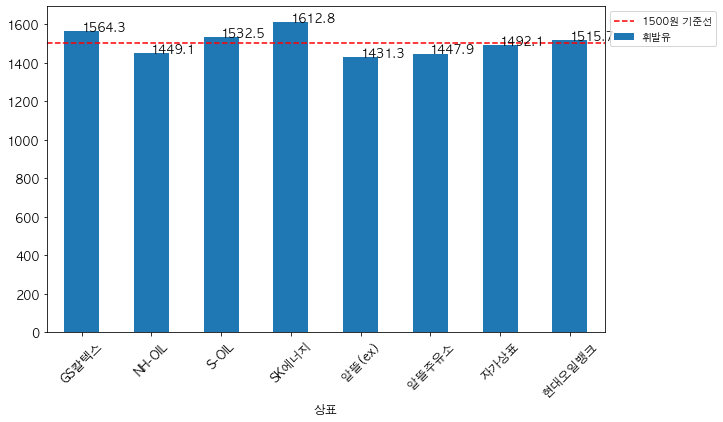

In [25]:
# 상표별 휘발유 평균가격 시각화
plt.figure(figsize = (10, 6))
상표_mean.plot.bar(rot = 45)

# 텍스트로 각 막대에 값을 출력
for i in range(상표_mean.size):
    plt.text(i, # x
             상표_mean[i], # y
             np.round(상표_mean[i],1), # txt
             fontsize = 12)
# 기준선 넣기 
plt.axhline(y = 1500, color = 'r', linestyle = '--', label = '1500원 기준선')

plt.legend(bbox_to_anchor = (1,1), loc = 'upper left') 
    
plt.show()

- 기준선을 넣고 싶다면? 
    - 방법1) axhline 수평기준선
       : y축을 
    - 방법2) axvline 수직기준선

In [26]:
# 셀프주유소와 일반주유소 개수 확인
self_count = df['셀프여부'].value_counts()
self_count

일반    108492
셀프     73222
Name: 셀프여부, dtype: int64

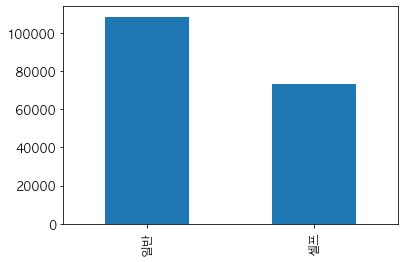

In [27]:
# 셀프주유소와 일반주유소 개수 시각화
self_count.plot(kind = 'bar')
plt.show()

In [28]:
# 셀프 여부에 따른 휘발유 평균 가격 비교
df[df['휘발유']!=0].groupby('셀프여부')['휘발유'].mean() # 0값은 제외 

셀프여부
셀프    1490.262029
일반    1619.690059
Name: 휘발유, dtype: float64

In [29]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
df[df['휘발유']!=0].groupby(['셀프여부','상표'])['휘발유'].mean() # 방법1.

셀프여부  상표    
셀프    GS칼텍스     1481.410074
      S-OIL     1481.437428
      SK에너지     1505.054771
      알뜰(ex)    1431.347945
      알뜰주유소     1434.726027
      자가상표      1494.409449
      현대오일뱅크    1483.686804
일반    GS칼텍스     1610.516144
      NH-OIL    1449.088889
      S-OIL     1579.789061
      SK에너지     1691.365496
      알뜰주유소     1455.372511
      자가상표      1491.740351
      현대오일뱅크    1534.510147
Name: 휘발유, dtype: float64

In [30]:
#방법2. 피봇테이블로 
셀프여부_휘발유_mean = df[df['휘발유']!=0].pivot_table(
    vlues = '휘발유',
    index = '상표',
    columns = '설프여부', 
    aggfunc = 'mean')

TypeError: pivot_table() got an unexpected keyword argument 'vlues'

In [ ]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
셀프여부_휘발유_mean.plot(kind = 'bar', figsize = (10,6))
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left)
plt.show()

In [ ]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
# seaborn 쓰면 편하다 일반&휘발유, 셀프&휘발유 그룹바이를 씨본을쓰면 편해져
plt.figure(figsize = (10,10))
# sns.boxplot(x = '셀프여부',y ='휘발유', data = df)
sns.boxplot(x = '셀프여부',y ='휘발유', data = df[df['휘발유'!=0]]) # 0값을 제외하고싶다면
sns.boxplot(x = '상표',y ='휘발유', hue ='셀프여부', data = df[df['휘발유'!=0]])
plt.show()


# === 4교시 ======

In [ ]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
plt.figure(figsize =(15,10) )
sns.boxplot(x='상표', y='휘발유', data=df[df['휘발유'!=0]])
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
sns.violinplot(x='상표', y='휘발유', data=df[df['휘발유'!=0]])
plt.show()

In [ ]:
# 상표별 휘발유 가격의 분포를 셀프여부로 나눠 boxplot으로 시각화
#위에서 봄 

In [ ]:
# 구별 휘발유 가격의 평균
df.groupby('구')['휘발유'].mean()
구_휘발유_평균 = df.groupby('구')['휘발유'].mean().sort_values()

In [ ]:
# 구별 휘발유 가격의 평균 시각화
구_휘발유_평균.plot(kind = 'bar', figsize = (15,10), rot = 40)

# 평균가격 기준선 추가 : 
plt.axhline(y = 구_휘발유_평균.mean(), color = 'r', label = '휘발유 평균')

# plt.legend(labels = ['a','b']) # 레전드에 라벨을 직접 지정할수 있다.
plt.legend()
plt.show()

In [ ]:
# 중구(평균이 가장높음)의 상표별 휘발유 평균가격
df[df['구'] == '중구'].groupby('상표')['휘발유'].mean()
# df[df['구'] == '중구'].groupby('상표')[['고급휘발유','휘발유','경유']].mean()

In [ ]:
# 월 평균 휘발유 가격의 평균
월_휘발유_평균 = df.groupby('월')['휘발유'].mean()
월_휘발유_평균

In [ ]:
# 월별 휘발유 가격 변화 추세 시각화
# 월_휘발유_평균.plot.bar()
월_휘발유_평균.plot(kind = 'line', figsize = (10,5))

#1-12월 다 보고싶다면 틱을 설정한다
plt.xticks(range(1,13), label = [f'{m}월' for m in range(1,13)]) #틱위치, 라벨(생략가능, 생략시 틱의 위치가 라벨)

plt.show()

# ==== 5교시 ====== 점심 이후, 여기 들어야함

In [ ]:
# 각 구의 월별 평균 휘발유 가격 
구_월별_휘발유_평균 = df.pivot_table(
    values = '',
    index = '',
    columns = '구',
    aggfunc = 'mean'
)
구_월별_휘발유_평균

In [ ]:
# 각 구의 월별 평균가격의 변화추이 시각화
# 컬럼단위별로 선그래프를 그린다. 
구_월별_휘발유_평균.plot(kind = 'line', figsize = (20,10))

plt.legend(bbox_to_anchor = (1,1), loc = 'upper left', ncol = 2)


plt.show()

In [ ]:
# 가장 휘발유가격이 비싼 주유소 상위 5 
# 서남주유소가 계속 나오기 때문에 다른 주유소 5개를 추출해보자. 주유소 단위로 보기
비싼주유소 = df.groupby('상호')['휘발유'].mean().sort_values(ascending = False).head(5)
비싼주유소

In [ ]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 
저렴한주유소 = df.groupby('상호')['휘발유'].mean().sort_values().head(5)
저렴한주유소

In [ ]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates())
df.loc[(df['상호']=='서남주유소')|(df['상호']=='장충주유소'),['상호','지역','주소']].drop_duplicates()
# 이렇게 해서 언제 연산해.. ==> isin 
df['상호'].isin(['서남주유소','장충주유소'])
df.loc[df['상호'].isin(비싼주유소.index),['상호','지역','주소']].drop_duplicates()

In [ ]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)
df.loc[df['상호'].isin(저렴한주유소.index),['상호','지역','주소']].drop_duplicates()